In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# `Linear Regression`

### ------------------------------------------------------------------------------------------------

# Overview 

 **Goal**: predict the behavior of a continuous _endogenous_ variable given its corresponding _exogenous_ variables.
 
 **Model**: $y = X{\beta} + {\epsilon}$

**Terms**:
- $y$: vector of endogenous values
- $X$: matrix of exogenous values
- $\beta$: vector of coefficients for exogenous variables
- $\epsilon$: a representation of the random errors or fluctuations around the predicted line or plane

**Functionality**:
- $y$ is the result of taking the matrix product of $\beta$ and $X$
- i.e. each row in $y$ is the sum of the products, for that row, of each value of $X$ with its corresponding $\beta$

**Basic example**:
- *endogenous*: price of an apartment
- *exogenous*: square footage (1), number of rooms (2)
- $y = \beta_{0} + \beta_{1} * X_{1} + \beta_{2} * X_{2} + \epsilon$
- i.e. $constant + coefficient_{1} * area + coefficient_{2} * rooms$

### ------------------------------------------------------------------------------------------------

# In Focus: Linear Algebra (Matrix Products)

**Two matrices**:
- $matrix_{1}$ ($m$ x $n$) x $matrix_{2}$ ($n$ x $p$) yields a matrix with dimensions $m$ x $p$
- each entry $x_{i, j}$ in the resulting matrix $X$ is the result of the dot product of $row_{i}$ in matrix 1 and $column_{j}$ in matrix 2

$$X_{1} = \left(\begin{array}
{rrr}
1 & 2 \\
4 & 5 
\end{array}\right), \space\space X_{2} = \left(\begin{array}
{rrr}
5 & 6 \\
7 & 8 
\end{array}\right)
$$

$$X_{1} \cdot X_{2} =
\left(\begin{array}
{rrr}
{1 * 5 + 2 * 7} & {1 * 6 + 2 * 8} \\
{4 * 5 + 5 * 7} & {4 * 6 + 5 * 8}
\end{array}\right) =
\left(\begin{array}
{rrr}
19 & 22 \\
55 & 64
\end{array}\right)$$

In [3]:
x1 = np.matrix([[1, 2], [4, 5]])

In [4]:
x1.shape

(2, 2)

In [5]:
x2 = np.matrix([[5, 6], [7, 8]])

In [6]:
x2.shape

(2, 2)

In [7]:
x3 = x1 * x2

In [8]:
x3

matrix([[19, 22],
        [55, 64]])

In [9]:
x3.shape

(2, 2)

#### Note: 
- you must be careful changing the order of the terms in the product

In [10]:
x2 * x1

matrix([[29, 40],
        [39, 54]])

In [11]:
x1

matrix([[1, 2],
        [4, 5]])

In [12]:
x1.T

matrix([[1, 4],
        [2, 5]])

In [13]:
(x2.T * x1.T)

matrix([[19, 55],
        [22, 64]])

In [14]:
(x2.T * x1.T).T

matrix([[19, 22],
        [55, 64]])

**Matrix and vector**:
- special case of the above
- matrix ($m$ x $n$) $\cdot$ vector ($n$ x 1) yields a vector with dimensions $m$ x 1
- each entry $x_{(i}$ in the resulting vector $X$ is the result of the dot product of $row_{i}$ in the matrix and $entry_{j}$ in the vector

$$X_{1} = \left(\begin{array}
{rrr}
1 & 2 \\
4 & 5 
\end{array}\right), \space\space X_{2} = \left(\begin{array}
{rrr}
5 \\
7 
\end{array}\right)
$$

$$X_{1} \cdot X_{2} =
\left(\begin{array}
{rrr}
{1 * 5 + 2 * 7} \\
{4 * 5 + 5 * 7}
\end{array}\right) =
\left(\begin{array}
{rrr}
19 \\
55
\end{array}\right)$$

In [15]:
x1 = np.matrix([[1, 2], [4, 5]])

In [16]:
x1.shape

(2, 2)

In [17]:
x2 = np.matrix([[5], [7]])

In [18]:
x2.shape

(2, 1)

In [19]:
x3 = x1 * x2

In [20]:
x3

matrix([[19],
        [55]])

In [21]:
x2.T * x1

matrix([[33, 45]])

In [22]:
x2.T * x1.T

matrix([[19, 55]])

In [23]:
(x2.T * x1.T).T

matrix([[19],
        [55]])

### ------------------------------------------------------------------------------------------------

# Parameter Estimation - OLS

**Goal**: given $X$ and $y$, find $\beta$

**Method**: there exist many ways to reach our goal - we will start with Ordinary Least Squares (OLS)

(notes written with support from [Wikipedia](https://en.wikipedia.org/wiki/Ordinary_least_squares) and [ESL](http://web.stanford.edu/~hastie/ElemStatLearn/))

### Background

- to measure the distance between a response and a predicted response, one can take the difference between the two values
- this would be written as, for the $i^{th}$ data point, $y_{i} - {X_{i}}\beta$ (note that $X_{i}$ is a row of $X$), and is referred to as the _residual_ for this data point

### Overall model fit

- summing the squares of all residuals provides a measure of overall model fit
- sum of squared residuals: $\sum_{i=1}^{n}(y_{i} - \sum_{j=1}^{p}{X_{i, j}\beta_{j})}^{2} = {(y-X\beta)}^{T}(y-X\beta)$

### Estimate Beta

- if we find the values of $\beta$ that minimize the sum of the squared residuals, we have found the model coefficients that provide the best fit
- to find the values of $\beta$ that minimize ${(y-X\beta)}^{T}(y-X\beta)$ we need to first differentiate with respect to $\beta$, yielding a first derivative $-2X^{T}(y - X\beta)$
- if we set that first derivate equal to 0, $X^{T}(y - X\beta) = 0$, we can, making some assumptions, solve to:

$$\hat\beta = (X^{T}X)^{-1}X^{T}y$$

- see more on the derivation of OLS regression [here](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf)

### Evaluation

- a commonly used metric for fit assessment is that of $R^{2}$
- this is the ratio of the variance of $\hat{y}$ around the mean of $y$, $\bar{y}$, to the variance of $y$, i.e. the ratio of "explained" to "total" variance of $y$
- which is written as $\large\frac{\sum(\hat{y} - \bar{y})^{2}}{\sum(y - \bar{y})^{2}}$
- useful use of this metric requires the model to include a constant, or $\beta_{0}$, term, in which case 0 < $R^{2}$ < 1, with closer to 1 being better

### ------------------------------------------------------------------------------------------------

# Implementation

In [24]:
class LinearRegressor:
    """Linear Regression class, built for NumPy arrays. 
    Fits using OLS. Always supplies a constant coefficient.
    Very unstable!"""
    
    def __init__(self):
        self.X = None
        self.y = None
        self.B = None
        self.y_hat = None
        
    
    def fit(self, X, y):
        X = np.vstack((X, np.ones((1, X.shape[0])))).T
        self.B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.X = X
        self.y = y
    
    
    def predict(self, X):
        if self.B is None:
            return None
        self.y_hat = self.X.dot(self.B)
        return self.y_hat

    
    def r_sqrd(self):
        if self.y is None:
            return None
        elif self.y_hat is None:
            y_hat = self.predict()
            
        y_bar = np.mean(self.y)
        explained = np.sum(np.power(self.y_hat - y_bar, 2))
        total = np.sum(np.power(self.y - y_bar, 2))
        return explained / total

### ------------------------------------------------------------------------------------------------

# Testing

### Generate Fake Data

In [25]:
x = np.array(range(100))

In [26]:
y = 2 * x

In [27]:
x = x - .1 * np.random.randint(-50, 50, 100)

In [28]:
y = y - .1 * np.random.randint(-50, 50, 100)

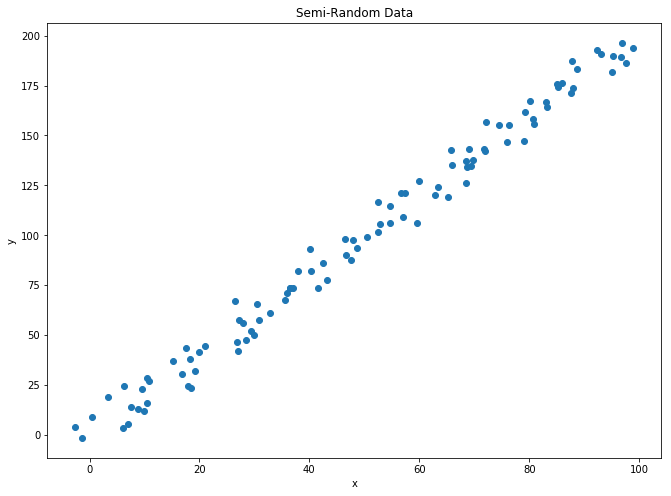

In [29]:
plt.figure(figsize=(11, 8))
ax = plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
t = plt.title("Semi-Random Data")

In [30]:
LR = LinearRegressor()

In [31]:
LR.fit(x, y)

In [32]:
y_hat = LR.predict(x)

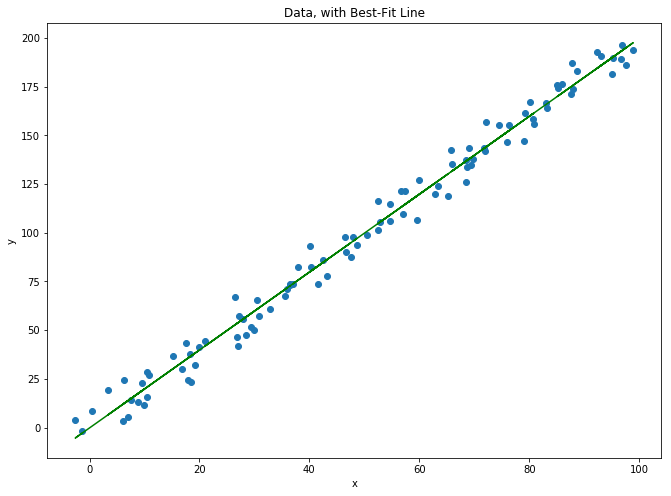

In [33]:
plt.figure(figsize=(11, 8))
ax = plt.scatter(x, y)
ax = plt.plot(x, y_hat, c="g")
plt.xlabel("x")
plt.ylabel("y")
t = plt.title("Data, with Best-Fit Line")

In [34]:
LR.r_sqrd()

0.98658278244357012